In [103]:
# import necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:

# load as Pandas dataframe

df1 = pd.read_csv("takehome_user_engagement.csv",parse_dates = ["time_stamp"])

In [106]:
# Take a look at  first 2 rows of the dataframe
df1.sample(2)

,time_stamp,user_id,visited
91145,2014-04-11 13:21:07,5027,1
2312,2013-09-18 13:52:18,146,1


In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [108]:

# load as Pandas dataframe

df2 = pd.read_csv("takehome_users.csv", encoding ="latin-1", parse_dates=['creation_time',"last_session_creation_time"])

In [109]:
# Take a look at  first 3 rows of the dataframe
df2.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0


In [110]:
df2['last_session_creation_time'] = pd.to_datetime(df2['last_session_creation_time'], unit='s')
df2.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0


In [111]:
#columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [112]:
#find the difference in time from creation to last login
#df2['difference_creation_time'] = (df2['last_session_creation_time'] - df2['creation_time']).dt.days

In [113]:
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [114]:
# Let's look at top 10 active users who may or may not be adopted users
df1.user_id.value_counts().head(10)

3623    606
906     600
1811    593
7590    590
8068    585
9402    581
4022    580
3269    566
9312    547
7210    545
Name: user_id, dtype: int64

In [115]:
# top 3 users?
df2[(df2['object_id'] == 3623) | (df2['object_id'] == 906) | (df2['object_id'] == 1811)]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
905,906,2012-06-17 22:49:52,Becker Jessika,JessikaBecker@gmail.com,SIGNUP_GOOGLE_AUTH,2014-06-04 22:49:52,0,0,358,NaN
1810,1811,2012-06-19 16:09:31,Carvalho Eduardo,EduardoCunhaCarvalho@gmail.com,SIGNUP_GOOGLE_AUTH,2014-05-24 16:09:31,1,1,33,NaN
3622,3623,2012-06-25 14:34:33,Melo Vitória,VitoriaAlvesMelo@jourrapide.com,ORG_INVITE,2014-05-27 14:34:33,0,0,364,3623.0


In [116]:
# Create a column of the year and the week of the year
df1['week'] = df1['time_stamp'].dt.strftime('%Y-%U')

In [117]:
weeks = df1.groupby(['user_id', 'week']).size()
weeks.head(1)

user_id  week   
1        2014-16    1
dtype: int64

In [118]:
weeks =weeks.reset_index().rename(columns={0:'count'})
weeks.head()

,user_id,week,count
0,1,2014-16,1
1,2,2013-45,1
2,2,2013-47,1
3,2,2013-49,1
4,2,2013-51,1


An "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period.Now that we have the number of times a user has logged on in one week, we will now see if this has ever exceeded 3 times, because this is what defines an adopted user.

In [119]:
adopted = weeks.loc[weeks['count'] >= 3].user_id.unique()
print('Number of Adopted Users: {}'.format(len(adopted)))

Number of Adopted Users: 1432


In [120]:
df2['adopted'] = (df2['object_id'].isin(adopted))
df2.shape

(12000, 11)

In [121]:
df2.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,False


In [162]:
 # merge df1 users and  df2 adopted users dataframe
df = df2.merge(df1, left_on='object_id', right_on='user_id', how='outer')

df.head(2)

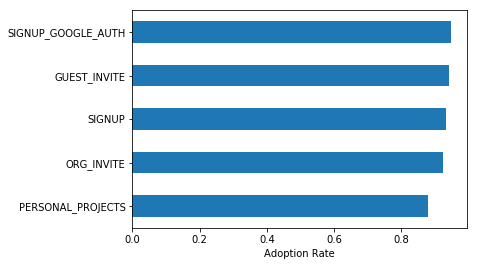

In [164]:
df.groupby('creation_source')['adopted'].mean().sort_values(0).plot(kind='barh')
plt.xlabel('Adoption Rate')
plt.ylabel('')
plt.show()

A s shown,  Users who were invited to an organization as a guest or whoever signed up using Google Authentication have the highest adoption rate while users who were invited to join through another user's personal projects have the lowest adoption rate .

In [165]:
# drop column user_id since it is duplicate with user_id
df.drop('object_id', axis=1, inplace=True)
# replace NaN with zero
df = df.fillna(0)
df.set_index("week",inplace = True)
df.columns

Index(['creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'adopted',
       'time_stamp', 'user_id', 'visited'],
      dtype='object')

In [166]:
df.dtypes

creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time            object
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
adopted                                 bool
time_stamp                            object
user_id                              float64
visited                              float64
dtype: object

In [167]:
# convert  adopted column of boolean values to a column of integers 1 or 0:
df["adopted"]=df["adopted"].astype(int)
df.dtypes

creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time            object
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
adopted                                int32
time_stamp                            object
user_id                              float64
visited                              float64
dtype: object

In [168]:
df['creation_source'] = df['creation_source'].astype("category")
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['creation_source']= label_encoder.fit_transform(df['creation_source'])
#read first two rows after transforming categorical columns as numerical columns
df.dtypes

creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                        int32
last_session_creation_time            object
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
adopted                                int32
time_stamp                            object
user_id                              float64
visited                              float64
dtype: object

In [169]:
df.head(2)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,time_stamp,user_id,visited
week,,,,,,,,,,,,,
2014-16,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,0,2014-04-22 03:53:30,1,0,11,10803.0,0,2014-04-22 03:53:30,1.0,1.0
2013-45,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,2014-03-31 03:45:04,0,0,1,316.0,0,2013-11-15 03:45:04,2.0,1.0


In [170]:
#Split the dataset X, y
X = df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id','visited']]
y = df['adopted']==1

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)


[-0.00000000e+00  0.00000000e+00 -0.00000000e+00  4.00763000e-05
  0.00000000e+00  9.12555512e-01]


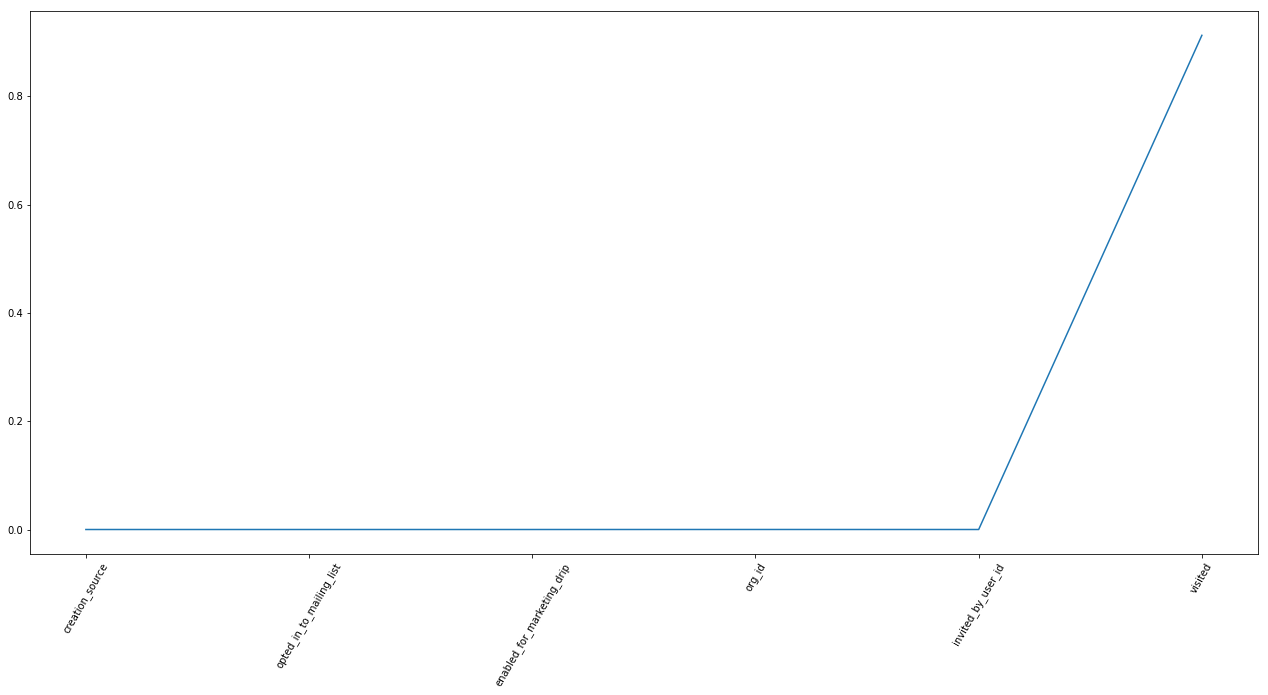

In [172]:
# Import Lasso
from sklearn.linear_model import Lasso

df_columns = pd.DataFrame(X_train)
df_columns.shape

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha = .00001,normalize = True)

# Fit the regressor to the data
lasso.fit(X_train,y_train)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
fig = plt.figure(figsize=(22,10))
# Plot the coefficients
plt.plot(range(len(df_columns.columns)), lasso.coef_);
plt.xticks(range(len(df_columns.columns)), df_columns.columns.values, rotation=60)

plt.show()

From this model, it looks like "visited" is a very significant factor and it's hard to see if any other factors could be a good indicator. Therefore, I will try running the model without"visited" to understand what the following predictors could be.

In [173]:
#Split the dataset X, y
X = df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']]
y = df['adopted']  ==1

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

[ 4.48380795e-03  4.09536084e-03 -2.69565845e-03  1.00486316e-04
  2.04876692e-06]


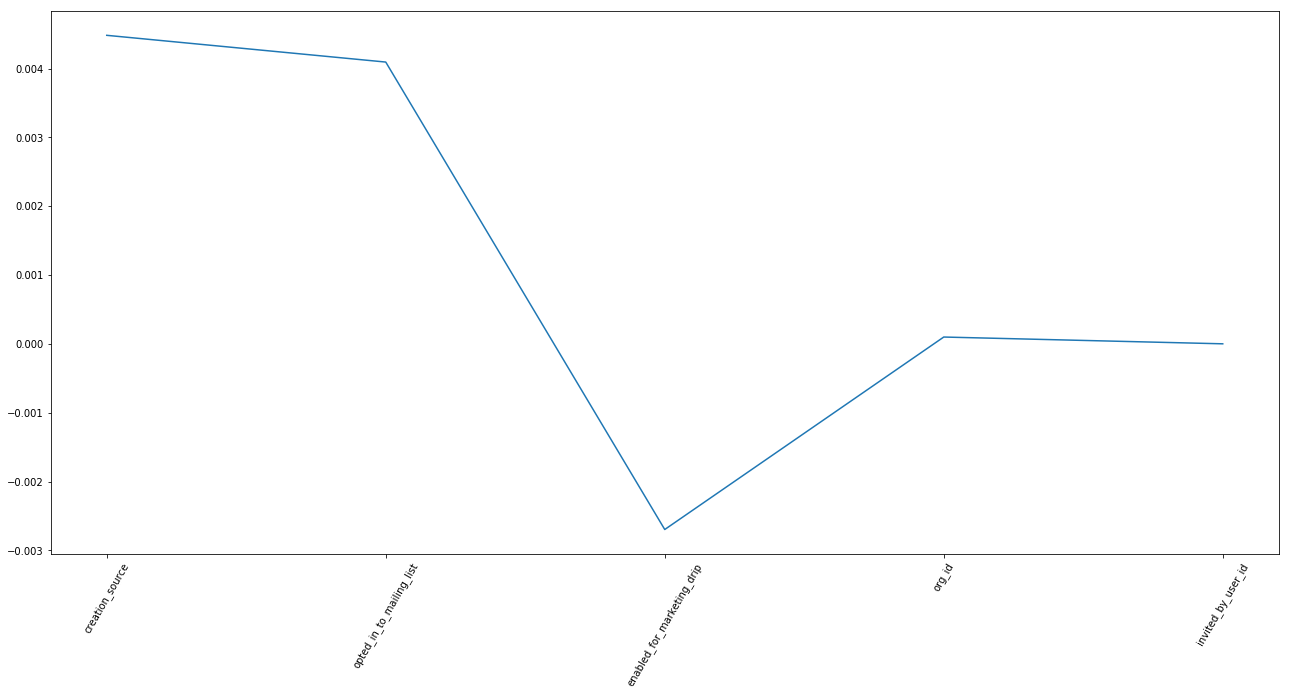

In [175]:
# Import Lasso
from sklearn.linear_model import Lasso

df_columns = pd.DataFrame(X_train)
df_columns.shape

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha = .0000001,normalize = True)

# Fit the regressor to the data
lasso.fit(X_train,y_train)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
fig = plt.figure(figsize=(22,10))
# Plot the coefficients
plt.plot(range(len(df_columns.columns)), lasso.coef_);
plt.xticks(range(len(df_columns.columns)), df_columns.columns.values, rotation=60)

plt.show()

In [176]:
data = {'variables' :df_columns.columns,
        'Lasso_coeeficients': lasso.coef_}

lasso_df = pd.DataFrame(data)
lasso_df

,variables,Lasso_coeeficients
0,creation_source,0.004484
1,opted_in_to_mailing_list,0.004095
2,enabled_for_marketing_drip,-0.002696
3,org_id,0.000100
4,invited_by_user_id,0.000002


From these results, we can see that only 'creation_source', 'opted_in_to_mailing_list' have a statistically significant difference in the distribution of adopted users followed by 'org_id', 'invited_by_user_id'. Surprisingly, 'enabled_for_marketing_drip' doesn't seem to have a huge impact which actually  is a personalized automation campaign that helps in analyzing the chances of losing subscribers and hurting email reputations in real world. Therefore, based on the dataset given, we can say that only some variables affect if a user will adopt the product or not.